In [7]:
df = pd.read_csv("diabetes.csv")
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17],
    'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17 ],
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17],
})

nn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
print()

In [8]:
import numpy as np
from collections import Counter

In [9]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [57]:
expr = pd.read_csv("diabetes.csv")
diabetic = expr[expr['Outcome'] == 1]
diabetic =diabetic.drop(['Outcome'], axis=1)
diabetic_x = diabetic.values[:, 0:(diabetic.shape[1] - 1)]
diabetic_x = np.log(diabetic_x + 1)
n = diabetic_x.shape[0]
print("\nThis data set contains " + str(n) + " samples")


This data set contains 268 samples


In [58]:
diabetic_y = diabetic.values[:, diabetic.shape[1] - 1]
print("\nDimensions of the  data set: ")
print(diabetic.shape, diabetic_y.shape)


Dimensions of the  data set: 
(268, 8) (268,)


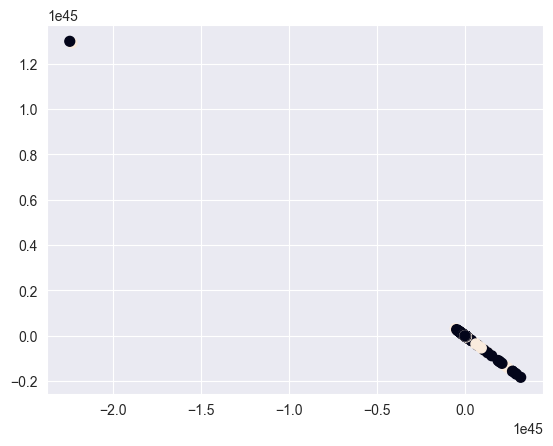

In [4]:
import my_tsne
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

# Assuming the last column contains the labels (adjust column name if needed)
label_column = 'Outcome'  # Update this to the correct column name in your dataset
X = df.drop(columns=[label_column])  # Drop the label column for t-SNE
labels = df[label_column].values

X = X.values
tsne = my_tsne.my_TSNE(0.6)
X_low = tsne.fit(X, 30, 2, 100)
plt.scatter(X_low[:, 0], X_low[:, 1], c=labels.astype(int), s=50, label='low')

In [1]:
import my_tsne
import pandas as pd

tsne = my_tsne.my_TSNE(0.6)

df = pd.read_csv('diabetes.csv')

# Assuming the last column contains the labels (adjust column name if needed)
label_column = 'Outcome'  # Update this to the correct column name in your dataset
X = df.drop(columns=[label_column])  # Drop the label column for t-SNE
labels = df[label_column].values

perps = [i for i in range(5, 50, 5)]
KLs = []
for p in perps:
    x_low = tsne.fit(X, p, 2, 100)
    KLs.append(tsne.get_KL())

In [2]:
print(KLs)

[np.float64(2186.9496396878258), np.float64(1656.1907104029085), np.float64(1168.3696728709656), np.float64(885.1931502496634), np.float64(783.5491574062114), np.float64(879.3613246325633), np.float64(662.5069832063324), np.float64(746.8180707045391), np.float64(687.0663369236426)]


Text(0, 0.5, 'kl divergence')

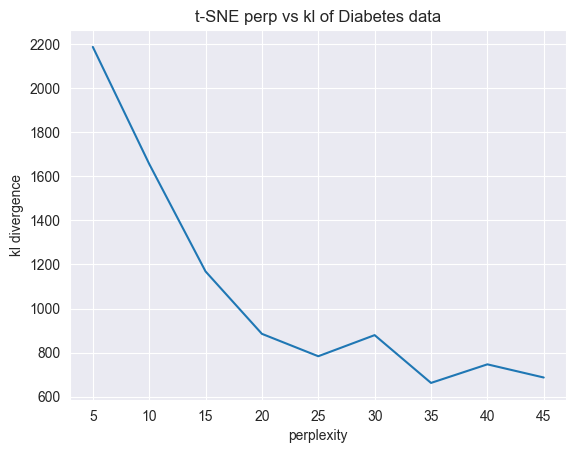

In [3]:
import matplotlib.pyplot as plt
plt.plot(perps, KLs)
plt.title("t-SNE perp vs kl of Diabetes data")
plt.xlabel("perplexity")
plt.ylabel("kl divergence")